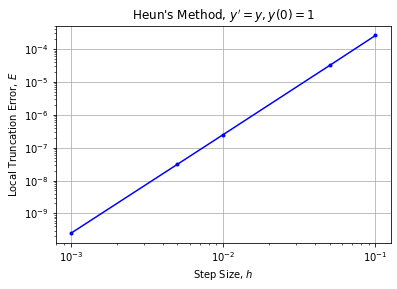

3.0310666597847753
3.0117271148975084
3.0035554868408743
3.0012352997851135


In [2]:

import numpy as np
import matplotlib.pyplot as plt

def odeHeun(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n+1],y[n] + k1*h)
        y[n+1] = y[n] + (k1 + k2)/2*h
    return y



f = lambda t,y: y*np.cos(t)
y0 = 1;
h = [0.1,0.05,0.01,0.005,0.001]
E = np.zeros(len(h))
for n in range(0,len(h)):
    y = odeHeun(f,[0,h[n]],y0)
    y1 = y[1]
    y1_exact = np.exp(np.sin(h[n]))
    E[n] = np.abs(y1_exact - y1)
    
plt.loglog(h,E,'b.-'), plt.grid(True)
plt.title("Heun's Method, $y'=y,y(0)=1$")
plt.xlabel("Step Size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.show()

for j in range(len(h)-1):
    print((np.log(E[j+1]) - np.log(E[j]))/(np.log(h[j+1]) - np.log(h[j])))

Heun's method is given by the 2-stage recursive formula:

$$\begin{align}
h &= t_{n+1} - t_n \\\
k_1 &= f(t_n,y_n) \\\
k_2 &= f(t_n + h,y_n + k_1 h) \\\
y_{n+1} &= y_n + \left( \frac{k_1 + k_2}{2} \right)h
\end{align}$$